# Практическое задание 1. EM-алгоритм

[Источник практического задания](https://github.com/mmp-mmro-team/mmp_mmro_spring_2024/blob/main/Homework3/homework-practice-09-em.ipynb)

## Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи).

Сдавать задание после указанного жёсткого срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи !!ВАЖНО!!!
Задания сдаются через систему google classroom. Посылка должна содержать:
* Ноутбук homework-practice-em-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**

# Generative model of Labels, Abilities, and Difficulties (GLAD)

В [семинаре 15](https://github.com/esokolov/ml-course-hse/blob/master/2020-spring/seminars/sem15-em.pdf) мы рассмотрели задачу восстановления истинной разметки по меткам от экспертов (которым мы не можем доверять в полной мере, более того, их предсказания могут расходиться).

Рассмотрим следующую вероятностную модель:

$$ p(L, Z | \alpha, \beta) = \prod_{i=1}^{n} \prod_{j=1}^m \sigma(\alpha_j\beta_i)^{[l_{ij}=z_i]}\sigma(-\alpha_j\beta_i)^{1-[l_{ij}=z_i]} p(z_j)$$

где $l_{ij} -$ ответ $j$-го эксперта на задачу $i$, $z_j -$ истинная разметка, $\alpha_j, \beta_i-$ уровень экспертизы и сложность задачи соответственно. Для более подробного описания модели можно прочитать материалы семинара, а также [оригинальную статью](http://papers.nips.cc/paper/3644-whose-vote-should-count-more-optimal-integration-of-labels-from-labelers-of-unknown-expertise.pdf). Априорное распределение положим равномерным: $p(z_i) = 0.5$.

In [71]:
import numpy as np
from sklearn.metrics import accuracy_score
seed = 0xDEADF00D
np.random.seed(seed)

P_PRIOR = 0.5

In [3]:
L = np.load('L.npy')
n, m = L.shape
print(f"Число задач (n_problems): {n}, число экспертов (n_experts): {m}")

Число задач (n_problems): 2000, число экспертов (n_experts): 20


---

**Задание 1. (2 балла)** Реализуйте EM-алгоритм для заданной выше модели. Вы можете воспользоваться предложенными шаблонами или написать свои. 

Обратите внимание, что правдоподобие моделирует не вероятность метки $l_{ij}$ принять значение 1 или 0, а вероятность того, что она равна скрытой переменной $z_i$, т.е. $p(l_{ij} = z_j|z_j, \alpha_j, \beta_i) \neq p(l_{ij} = 1|\alpha_j, \beta_i) $. При этом заранее неизвестно, какая из скрытых переменных соответствует метке 1. Не забывайте, что параметры $\beta_i$ должны быть неотрицательными; для этого оптимизируйте $\log \beta$. На M-шаге можете использовать как один шаг градиентного спуска, так и несколько: разумные результаты у вас должны получаться вне зависимости от числа итераций.

**Подсказки (могут быть актуальны на все задание):**

* При работе с вероятностями не забывайте о точности:
 1. Используйте логарифмы вероятностей.
 2. $\log \sigma(a)$ лучше преобразовать в $\log \sigma(a) = -\log(1 + \exp(-a)) = -\mathrm{softplus}(-a) $
 3. Ещё полезные функции: `scipy.special.expit`, `scipy.special.logsumexp`, `np.log1p`
* Для отладки может быть полезно проверить градиенты, возвращаемые функциями `alpha_grad_lb` и `logbeta_grad_lb` с помощью `scipy.optimize.check_grad`.
* Размеры возвращаемых значений, указанные в докстринге функций могут помочь вам понять, что необходимо возвращать
* Почитайте докстринги, в них есть подсказки и ссылки на формулы из семинара
* Если у вас вылезают где-то nan/inf -- попробуйте урезать значения снизу. Например, у вас есть место, где берется log(theta) -- тут имеет смысл урезать theta = max(theta, eps), где eps какое-то маленькое число (например 1e-8)

---

In [132]:
import numpy as np
from scipy.special import softmax, expit

P_PRIOR = 0.5

def softplus(x):
    '''stable version of log(1 + exp(x))'''
    c = (x > 20) * 1.
    return np.log1p(np.exp(x * (1-c)) * (1-c)) + x * c


def log_likelihood(alpha, beta, L, z):
    """ p(l=z|z, \alpha, \beta)
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
        z: ndarray of shape (n_problems).
    Returns:
        ndarray of shape (n_problems,)
    Tips:
        See page 7 of seminar, the second formula for details
    """

    alpha_beta_product = (alpha[:, np.newaxis] * beta[np.newaxis, :]).T
    
    mask = L == z[:, np.newaxis]

    return (
        -softplus(-alpha_beta_product) * mask.astype(float) +
        -softplus(alpha_beta_product) * (~mask).astype(float)
    )

def posterior(alpha, beta, L):
    """ Posterior over true labels z p(z|l, \alpha, \beta)
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
    Returns:
        ndarray of shape (2, n_problems)
        (2 -- for z = 0 and for z = 1, n_problems -- for each problem in data)
    Tip:
        You may use function log_likelihood here
        See page 7 of seminar, the last formula for details
    """
    gamma_0 = (
        np.log(P_PRIOR) +
        log_likelihood(alpha, beta, L, np.zeros(L.shape[0])).sum(axis=1)
    )
    gamma_1 = (
        np.log(P_PRIOR) +
        log_likelihood(alpha, beta, L, np.ones(L.shape[0])).sum(axis=1)
    )
    
    gamma = np.stack([gamma_0.T, gamma_1.T], axis=1)

    return softmax(gamma, axis=1).T


def alpha_grad_lb(alpha, beta, L, q):
    """ Gradient of lower bound wrt alpha
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
        q: ndarray of shape (2, n_problems).
    Returns:
        ndarray of shape (n_experts,)
    Tips:
        See pages 8-9 of seminar for details
    """
    alpha_beta = (alpha[:, np.newaxis] * beta[np.newaxis, :]).T
    mask = (L == 0)
    
    # 2000 x 20
    t0 = mask * expit(-alpha_beta) - (~mask).astype(float) * expit(alpha_beta)
    t1 = (~mask).astype(float) * expit(-alpha_beta) - mask * expit(alpha_beta)

    # 2000 x 20
    tq0 = t0 * q[0, :][:, np.newaxis]
    tq1 = t1 * q[1, :][:, np.newaxis]

    # 2 x 2000 x 20 --> 20
    tqb = (np.stack([tq0, tq1]) * beta[:, np.newaxis]).sum(axis=(0, 1))

    return tqb
    

def logbeta_grad_lb(alpha, beta, L, q):
    """ Gradient of lower bound wrt alpha
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
        q: ndarray of shape (2, n_problems).
    Returns:
        ndarray of shape (n_problems,)
    Tips:
        See pages 8-9 of seminar for details
    """
    alpha_beta = (alpha[:, np.newaxis] * beta[np.newaxis, :]).T
    mask = (L == 0)
    
    # 2000 x 20
    t0 = mask * expit(-alpha_beta) - (~mask).astype(float) * expit(alpha_beta)
    t1 = (~mask).astype(float) * expit(-alpha_beta) - mask * expit(alpha_beta)

    # 2000 x 20
    tq0 = t0 * q[0, :][:, np.newaxis]
    tq1 = t1 * q[1, :][:, np.newaxis]

    # 2 x 2000 x 20 --> 2000
    tqa = (np.stack([tq0, tq1]) * alpha[np.newaxis, :]).sum(axis=(0, 2)) * beta

    return tqa


def lower_bound(alpha, beta, L, q):
    """ Lower bound
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
        q: ndarray of shape (2, n_problems).
    Returns:
        single value, number
    Tips:
        You may use function log_likelihood here
        See page 8 of seminar, the fourth formula for details
    """
    n = L.shape[0]
    
    llh_0 = log_likelihood(alpha, beta, L, np.zeros(n))
    llh_1 = log_likelihood(alpha, beta, L, np.ones(n))
    
    return np.sum(llh_0 * q[np.newaxis, 0].T + llh_1 * q[np.newaxis, 0].T)


**Подсказка:**
* При проверке alpha значения, выдываемые функцией `check_grad` должны быть не более 0.01. Иначе у вас где-то ошибка
* При проверке logbeta значения, выдываемые функцией `check_grad` должны быть не более 0.05. Иначе у вас где-то ошибка

In [133]:
from scipy.optimize import check_grad
from scipy.special import expit

alpha, logbeta = np.random.randn(m), np.random.randn(n)
beta = np.exp(logbeta)
q = np.ones((2, len(beta))) * 0.5

check_grad(
    lambda a: lower_bound(a, beta, L, q),
    lambda a: alpha_grad_lb(a, beta, L, q),
    alpha
)

0.0013666718199442651

In [134]:
check_grad(
    lambda lb: lower_bound(alpha, np.exp(lb), L, q),
    lambda lb: logbeta_grad_lb(alpha, np.exp(lb), L, q),
    logbeta
)

0.012215181913886123

In [97]:
from tqdm import tqdm 

def em(L, n_steps=1000, lr=1e-3, revert_thr=float('-inf')):
    # initialize parameters
    alpha, logbeta = np.random.randn(m), np.random.randn(n)
    q = np.ones((2, len(beta))) * 0.5

    # assert np.isnan(alpha).sum() == 0, f'step={step}, alpha contains None'
    # assert np.isnan(logbeta).sum() == 0, f'step={step}, logbeta contains None'
    # assert np.isnan(q).sum() == 0, f'step={step}, q contains None'

    for step in tqdm(range(n_steps)):
 
        # E-step

        q = posterior(alpha, np.exp(logbeta), L)

        assert np.isnan(q).sum() == 0, f'step={step}, logbeta contains None'
    
        # M-step
        alpha_grad = alpha_grad_lb(alpha, np.exp(logbeta), L, q) 
        logbeta_grad = logbeta_grad_lb(alpha, np.exp(logbeta), L, q) 
        
        # assert np.isnan(logbeta).sum() == 0, f'step={step}, logbeta contains None, {np.isnan(logbeta).sum()}'
        # assert np.isnan(q).sum() == 0, f'step={step}, q contains None, {np.isnan(q).sum()}'

        alpha += lr * alpha_grad
        logbeta += lr * logbeta_grad

    # если нет оснований предполагать, что большинство экспертов неэкспертны
    # так не очень правильно делать, оставлял только для отладки на текущей выборке
    # чтобы не исправлять метки на расчете accuracy по правильным ответам
    major_pred = np.mean(L, axis=1) >= 0.5
    em_pred = q.argmax(axis=0)
    if accuracy_score(major_pred, em_pred) <= revert_thr:
        alpha = -alpha
        q = np.array([q[1], q[0]])
        
    return alpha, np.exp(logbeta), q

In [135]:
alpha, beta, q = em(L)

100%|██████████| 1000/1000 [00:03<00:00, 265.43it/s]


---

**Задание 2. (1 балл)** Загрузите настоящую разметку. Посчитайте `accuracy` разметки, полученной с помощью обычного голосования по большинству среди экспертов, и сравните его с качеством **(?)**, полученным с помощью EM-алгоритма.

**Разбалловка:**
* **0.5 балла** -- качество голосования не менее 0.904
* **0.5 балла** -- качестве EM не менее 0.95

**Подсказка:**
* Помните, что алгоритму не важно, какая метка 0, а какая 1, поэтому если получите качество <0.5, то просто поменяйте метки классов (не забудьте также поменять знак у $\alpha$). 

---

In [136]:
y = np.load('y.npy')

major_pred = np.mean(L, axis=1) > 0.5
em_pred = q.argmax(axis=0)

print("majority: ", accuracy_score(y, major_pred))
print("EM      : ", accuracy_score(y, em_pred))

majority:  0.904
EM      :  0.9555


---

**Задание 3. (0.5 балла)** **(?)** Попробуйте проинтерпретировать полученные коэфициенты $\alpha$. **(?)**  Есть ли в выборке эксперты, которые намеренно голосуют неверно? **(?)**  Как это можно понять по альфам? 

* Продемонстрируйте, что эксперты действительно чаще голосуют за неверный класс. 
* Отобразите визуализацию зависимости доли врено размеченных экспертом объектов от коэффициента $\alpha$.
* **(?)**  Прокомментируйте результаты и полученную зависимость.

**Подсказки:**
* Если вы отобразили или хотели отобразить зависимость при помощи обычного plot (график), то посмотрите повнимательнее/подумайте, почему это не очень хорошая визуализация. **Для возможности получения полного балла** правильно будет использовать тип отображения scatter plot.
*  Также **для возможности получения полного балла** вам необходимо проинтерпретировать смысл зависимости для всех групп альф, которые вы увидите (спойлер: их должно быть 3:)

---

"Плохих" экспертов проверяем по альфам (это было в постановке задачи)

In [141]:
print("Доля неэкспертных экспертов: ", np.mean(alpha < 0))

Доля неэкспертных экспертов:  0.2


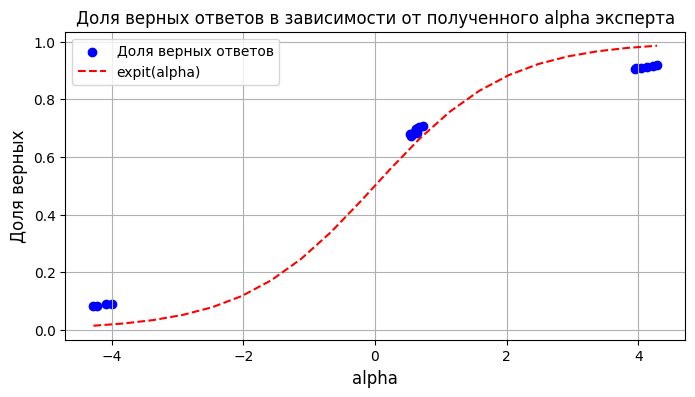

In [138]:
# (∩ᄑ_ᄑ)⊃━☆ﾟ*･｡*

import matplotlib.pyplot as plt  
  
part_correct_problems = (L == y[:, None]).mean(axis=0)  

x = np.linspace(alpha.min(), alpha.max(), num=len(alpha))
draw_line = expit(x)

plt.figure(figsize=(8, 4)) 
plt.scatter(alpha, part_correct_problems, color='blue', label='Доля верных ответов')
plt.plot(x, draw_line, color='red', label='expit(alpha)', linestyle='--')   
plt.title("Доля верных ответов в зависимости от полученного alpha эксперта", fontsize=12)
plt.xlabel("alpha", fontsize=12)
plt.ylabel("Доля верных", fontsize=12)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()  


1) про три класса спойлер подтвердился, это хорошо

2) полученные альфы хорошо ложатся в заданную функциональную зависимость вероятности правильного ответа, это тоже хорошо

3) 
    - доля ответов у экспертов с отрицательными альфами действительно близка к 0 (то, есть эти эксперты должны были намеренно голосовать неправильно)
    - обратная ситуация у "хороших" экспертов
    - и есть так же класс экспертов дающих чуть лучше чем случайные ответы (что так же подразумевалось для alpha~0)

4) учитывая маленький разброс альф при одинаковой доле правильных ответов, можем говорить, что альфа может действительно быть интерпретирован, как мера качества экспертов

5) особенная ценность, на мой взгляд, заключается в том, что альфы мы получаем вне зависимости от истинной разметки - т. е. можем проверить экспертов без других экспертов (тут как с блокчейном, главное чтобы > половины пользователей были честными))) 

---

**Задание 4. (бонус, 1 балл)**  Как уже было замечено выше, модели не важно, какой класс 1, а какой 0. Скажем, если все эксперты оказались максимально противными и ставят метку с точностью наоборот, то у вас будет полная согласованность между экспертами, при этом невозможно понять правильно они разметили выборку или нет, смотря только на такую разметку. Чтобы избежать этого, можно включать в выборку вопрос с заведомо известным ответом, тогда вы сможете определить, ставит ли эксперт специально неверные метки.

Чтобы обощить данную модель на случай заданий с заведомо известной меткой, достоточно не делать для них E-шаг, а всегда полагать апостериорное распределение вырожденным в истинном классе. 

* Реализуйте данную модель и используйте истинную разметку *для нескольких* задач из обучения. 
* **(?)**  Сравните модифицированный алгоритм с обычным. 
* **(?)** Проинтерпретируйте полученные результаты.

**Подсказка:**
* Как можно сравнить, что модифицированный алгоритм действительно "лучше" обычного: запускаем обычный и модифицированный много раз (например, 100). Для каждой версии считаем распределение полученных accuracy_score. Если все сделано верно, то в модифицированной версии доля больших значений accuracy должна быть выше, чем низких (это как раз и есть сигнал о перепутывании классов), а в обычной версии -- доли должны быть примерно равны. **Для возможности получения полного балла мы ожидаем от вас какого-то такого или похожего сравнения**

---

План такой: убираем из L метки перед расчетом постериорного, потом добавляем их обратно с заданным распределением явно указывающим на верный класс

In [160]:
np.array([[0.95, 0.05] if i==0 else [0.05, 0.95] for i in y[y_true_idx]]).shape

(10, 2)

In [181]:
# (∩ᄑ_ᄑ)⊃━☆ﾟ*･｡*

from tqdm import tqdm 

def em_with_real_labels(L, n_steps=1000, lr=1e-3, true_labels_num=100):
    # initialize parameters
    alpha, logbeta = np.random.randn(m), np.random.randn(n)

    y_true_idx = np.random.randint(0, L.shape[0], size=true_labels_num)
    mask = np.ones(L.shape[0], dtype=bool)  
    print({'mask.shape': mask.shape})
    mask[y_true_idx] = False  
    L_filtered = L[mask]  

    print(L_filtered.shape)
    

    q = np.ones((2, len(beta))) * 0.5
    # не уверен, но по опыту: нули подавать в распределение не очень план
    q_masked = np.array([[0.95, 0.05] if i==0 else [0.05, 0.95] for i in y[y_true_idx]]).T
    print(q_masked.shape)
    for step in tqdm(range(n_steps)):
 
        # E-step

        q_filtered = posterior(alpha, np.exp(logbeta[mask]), L_filtered)
        print(q_filtered.shape)
        q = np.concatenate([q_filtered, q_masked], axis=1)
        print(q.shape)

        assert np.isnan(q).sum() == 0, f'step={step}, logbeta contains None'
    
        # M-step
        q = np.concatenate([L_filtered, L[~mask]], axis=0)
        alpha_grad = alpha_grad_lb(alpha, np.exp(logbeta), L, q) 
        logbeta_grad = logbeta_grad_lb(alpha, np.exp(logbeta), L, q) 

        alpha += lr * alpha_grad
        logbeta += lr * logbeta_grad
        
    return alpha, np.exp(logbeta), q, mask

In [183]:
alpha, beta, q, mask = em_with_real_labels(L)

{(2000,): (2000,)}
(1901, 20)
(2, 100)


  0%|          | 0/1000 [00:00<?, ?it/s]

(2, 1901)
(2, 2001)


ValueError: operands could not be broadcast together with shapes (2000,20) (20,1) 

где-то накосячил с размерностями ЪУЪ

### Картинка для поддержки ваших чувств по этому заданию

![](https://a.d-cd.net/RAAAAgCnO-A-960.jpg)